In [25]:
import numpy as np
import pandas as pd

In [26]:
#Loading Dataset

data_path = 'Steel_industry_data.csv'
#Pandas Library to create Dataframe
Steel_data = pd.read_csv(data_path, engine='python')

In [27]:
#First five rows of dataset
Steel_data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [28]:
#Last five rows of dataset
Steel_data.tail()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31/12/2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [29]:
Steel_data['date'] = pd.to_datetime(Steel_data['date'], format='%d/%m/%Y %H:%M')

Steel_data['year'] = Steel_data['date'].dt.year
Steel_data['month'] = Steel_data['date'].dt.month
Steel_data['day'] = Steel_data['date'].dt.day
Steel_data['hour'] = Steel_data['date'].dt.hour
Steel_data['minute'] = Steel_data['date'].dt.minute

Steel_data = Steel_data.drop(columns=['date'])

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

Steel_data['WeekStatus'] = label_encoder.fit_transform(Steel_data['WeekStatus'])
Steel_data['Day_of_week'] = label_encoder.fit_transform(Steel_data['Day_of_week'])
Steel_data['Load_Type'] = label_encoder.fit_transform(Steel_data['Load_Type'])


In [31]:
Steel_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,2018,1,1,0,15
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,2018,1,1,0,30
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,2018,1,1,0,45
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,2018,1,1,1,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,2018,1,1,1,15


In [32]:
from sklearn.preprocessing import MinMaxScaler
continuous_columns = ['Usage_kWh', 
                      'Lagging_Current_Reactive.Power_kVarh', 
                      'Leading_Current_Reactive_Power_kVarh', 
                      'CO2(tCO2)', 
                      'Lagging_Current_Power_Factor', 
                      'Leading_Current_Power_Factor', 
                      'NSM']
scaler = MinMaxScaler()
Steel_data[continuous_columns] = scaler.fit_transform(Steel_data[continuous_columns])

In [33]:
Steel_data.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,year,month,day,hour,minute
0,0.020168,0.030441,0.0,0.0,0.7321,1.0,0.010526,0,1,0,2018,1,1,0,15
1,0.025449,0.046022,0.0,0.0,0.6677,1.0,0.021053,0,1,0,2018,1,1,0,30
2,0.020613,0.033846,0.0,0.0,0.7028,1.0,0.031579,0,1,0,2018,1,1,0,45
3,0.021059,0.036735,0.0,0.0,0.6809,1.0,0.042105,0,1,0,2018,1,1,1,0
4,0.024303,0.046435,0.0,0.0,0.6472,1.0,0.052632,0,1,0,2018,1,1,1,15


In [34]:
#Split dataset into train and test sets
train_size=int(len(Steel_data)*0.70)

train_data = Steel_data[:train_size]
test_data = Steel_data[train_size:]

In [35]:
print(f"Training data: {train_data.shape}")
print(f"Testing data: {test_data.shape}")

Training data: (24528, 15)
Testing data: (10512, 15)


In [36]:
#function to create data sequences
def create_dataset(dataset, timesteps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-timesteps):
        dataX.append(dataset[i:i+timesteps, 1:])
        dataY.append(dataset[i+timesteps, 0])
    return np.array(dataX), np.array(dataY)

In [37]:
train_values = train_data.values
test_values = test_data.values

In [38]:
#Define number of time steps
timesteps = 95

#Create sequences
x_train, y_train = create_dataset(train_values, timesteps)
x_test, y_test = create_dataset(test_values, timesteps)
print(y_train)

[0.02175849 0.02035882 0.02449421 ... 0.32453238 0.35914238 0.35685202]


In [39]:
print(x_train.shape), print(y_train.shape)

(24433, 95, 14)
(24433,)


(None, None)

In [40]:
print(x_test.shape), print(y_test.shape)

(10417, 95, 14)
(10417,)


(None, None)

In [55]:
#Import tensorflow for stacked LSTM
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [62]:
from tensorflow.keras.optimizers import Adam

def create_stacked_LSTM(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='SGD', loss='mean_squared_error')
    
    return model

In [63]:
from keras.optimizers import Adam
import random

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

input_shape = (95, 14)
model = create_stacked_LSTM(input_shape)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 95, 128)        │        73,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 95, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,073 (527.63 KB)

 Trainable params: 135,073 (527.63 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=50,
    batch_size=64,
    shuffle=False,
    verbose=1
)

Epoch 1/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 54s 139ms/step - loss: 0.0634 - val_loss: 0.0400
Epoch 2/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 54s 142ms/step - loss: 0.0592 - val_loss: 0.0398
Epoch 3/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 54s 141ms/step - loss: 0.0591 - val_loss: 0.0397
Epoch 4/50
 41/382 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - loss: 0.0862

KeyboardInterrupt: 

In [46]:
print(history.history)

{'loss': [0.05037521943449974, 0.048447221517562866, 0.04852879047393799, 0.04831385239958763, 0.04828997328877449, 0.04843844100832939, 0.04819001629948616, 0.048200856894254684, 0.04814695939421654, 0.04811471700668335, 0.04817876219749451, 0.04807672277092934, 0.04805310443043709, 0.04808560013771057, 0.048041969537734985, 0.048037413507699966, 0.048077426850795746, 0.04802504926919937, 0.04803616553544998, 0.04806152358651161, 0.048016875982284546, 0.048045527189970016, 0.04801614582538605, 0.04804205894470215, 0.04802846536040306, 0.04802604764699936, 0.04801247641444206, 0.04804551228880882, 0.047999307513237, 0.04803566634654999, 0.04802083596587181, 0.04802209138870239, 0.047996245324611664, 0.04802369326353073, 0.04801492020487785, 0.04800809547305107, 0.048003580421209335, 0.04801449552178383, 0.04801393672823906, 0.04798770323395729, 0.04797898232936859, 0.048018306493759155, 0.047991372644901276, 0.0480000376701355, 0.04797367751598358, 0.04798246920108795, 0.04798725247383

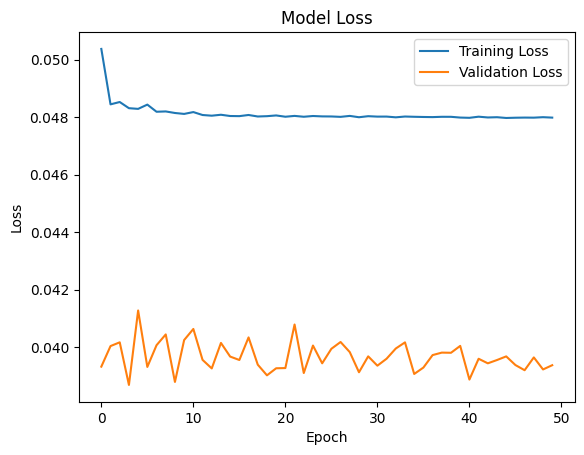

In [47]:
import matplotlib.pyplot as plt

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [48]:
#Prediction and performance metrics
train_prediction = model.predict(x_train)
test_prediction = model.predict(x_test)

764/764 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step
326/326 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


In [49]:
#Calculate RMSE performance metric
import math
from sklearn.metrics import mean_squared_error

train_rmse = math.sqrt(mean_squared_error(y_train, train_prediction))
test_rmse = math.sqrt(mean_squared_error(y_test, test_prediction))

print(f'Training Data RMSE: {train_rmse}')
print(f'Test Data RMSE: {test_rmse}')

Training Data RMSE: 0.21901352857458878
Test Data RMSE: 0.19843142364911076


In [50]:
#Calculate MAE performance metric
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, train_prediction)
test_mae = mean_absolute_error(y_test, test_prediction)

print(f'Training Data MAE: {train_mae}')
print(f'Test Data MAE: {test_mae}')

Training Data MAE: 0.18667062932471148
Test Data MAE: 0.17576177643716967


In [51]:
#Calculate MSE performance metric
train_mse = mean_squared_error(y_train, train_prediction)
test_mse = mean_squared_error(y_test, test_prediction)

print(f'Training Data MSE: {train_mse}')
print(f'Test Data MSE: {test_mse}')

Training Data MSE: 0.047966925698692216
Test Data MSE: 0.03937502989141287


In [52]:
#Calculate R2 performance metric
from sklearn.metrics import r2_score

train_r2_score = r2_score(y_train, train_prediction)
test_r2_score = r2_score(y_test, test_prediction)

print(f'Training Data r-squared: {train_r2_score}')
print(f'Test Data r-squared: {test_r2_score}')

Training Data r-squared: -0.00011696503748126474
Test Data r-squared: -0.01794824111831894


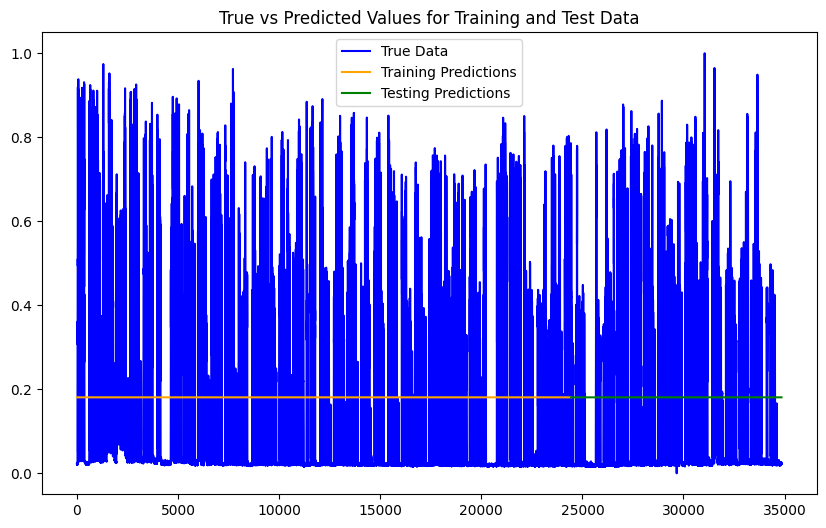

In [53]:
#Plot predictions against actual values

time_step = 95
train_prediction_plot = np.empty_like(np.concatenate([y_train, y_test]))
train_prediction_plot[:] = np.nan
train_prediction_plot[:len(train_prediction)] = train_prediction.flatten()

test_prediction_plot = np.empty_like(np.concatenate([y_train, y_test]))
test_prediction_plot[:] = np.nan
test_prediction_plot[len(train_prediction):] = test_prediction.flatten()

actual_values = np.concatenate([y_train, y_test])

plt.figure(figsize=(10,6))
plt.plot(actual_values, label = 'True Data', color='blue')
plt.plot(train_prediction_plot, label = 'Training Predictions', color='orange')
plt.plot(test_prediction_plot, label='Testing Predictions', color='green')

plt.xlabel=('Time Steps')
plt.ylabel=('Value')
plt.title('True vs Predicted Values for Training and Test Data')
plt.legend()

plt.show()


In [50]:
len(test_data)

10512

In [54]:
#Next 25 predictions using most recent test_data

output_list = []
i = 0
n_steps = 95
predictions = 100
test_input = test_data.to_numpy()
test_length = len(test_input)

start_value = test_length-n_steps-predictions
end_value = test_length-predictions

x_input = test_input[start_value:end_value, 1:]

while (i < 100):

    x_input = x_input.reshape((1, 95, 14))
    
    #store prediction in output list
    next_pred = model.predict(x_input)
    output_list = np.append(output_list, next_pred[0,0])

    #slide test_data window by 1 row
    x_input = x_input.reshape(95, 14)
    x_input = np.append(x_input[1:], test_input[start_value + i, 1:].reshape(1, -1), axis=0)

    i = i + 1

print(output_list)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [59]:
#Function to inverse transform array of values

def inverse_transform(array, num_features):
    dummy_array = np.zeros((len(array), num_features))
    dummy_array[:,0] = array

    original_values = scaler.inverse_transform(dummy_array)
    original_array = original_values[:,0]

    return original_array

In [65]:
#convert predictions to original values

transformed_output_list = inverse_transform(output_list, 7)
print(transformed_output_list)

NameError: name 'inverse_transform' is not defined

In [67]:
# Assuming y_test contains the actual data (last 95 values in the normalized scale)
previous_600_normalized = y_test[-600:]  # Last 95 normalized Usage_kWh

previous_600_actual = inverse_transform(previous_600_normalized, 7)

# Now, plot the actual and predicted values together
print(previous_600_actual[:25])

[3.38 3.74 4.1  4.18 4.1  4.18 3.64 3.46 3.46 3.38 3.42 3.42 3.42 4.03
 4.14 3.49 3.2  3.85 3.89 3.89 3.85 3.64 3.31 3.13 3.24]


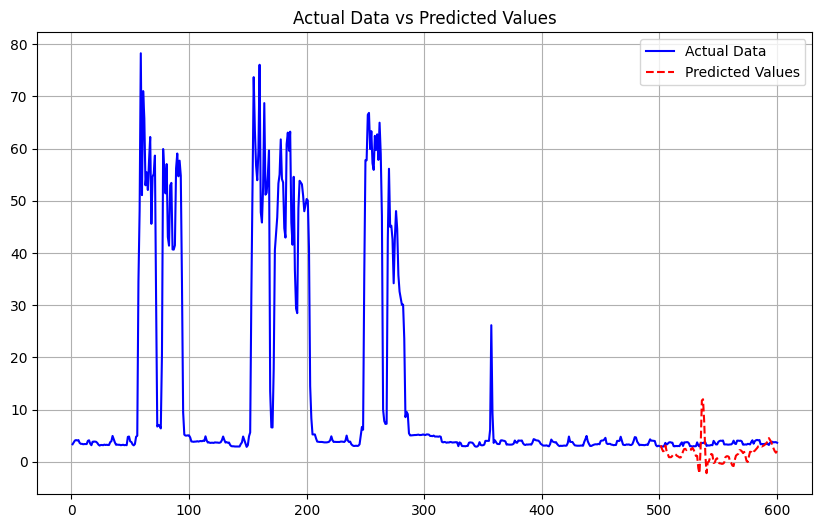

In [69]:
# Plot previous 95 and next 25 predictions
import matplotlib.pyplot as plt

days = np.arange(1, 601)
predicted_days = np.arange(501, 601)

plt.figure(figsize=(10, 6))
plt.plot(days, previous_600_actual, label="Actual Data", color='blue')

# Plot the predicted values for the last 95 days
plt.plot(predicted_days, transformed_output_list, label="Predicted Values", color='red', linestyle='--')

# Adding labels and title
plt.title("Actual Data vs Predicted Values")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()